# Importing Necessary modules

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

f:\Zomato Data Analysis\venv\lib\site-packages\tensorflow\python\client\session.py:1770: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

training_set = train_datagen.flow_from_directory(
    'train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
)

Found 20000 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    'test',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5000 images belonging to 2 classes.


In [10]:
images, labels = next(training_set)
print(images.shape)

(32, 64, 64, 3)


# Building the model


In [11]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history=model.fit(training_set,epochs=10,validation_data=test_set)

Epoch 1/10
625/625 [==============================] - 829s 1s/step - loss: 0.5769 - accuracy: 0.7002 - val_loss: 0.5350 - val_accuracy: 0.7348
Epoch 2/10
625/625 [==============================] - 565s 903ms/step - loss: 0.4410 - accuracy: 0.7960 - val_loss: 0.6756 - val_accuracy: 0.6536
Epoch 3/10
625/625 [==============================] - 245s 391ms/step - loss: 0.3652 - accuracy: 0.8401 - val_loss: 0.4353 - val_accuracy: 0.7874
Epoch 4/10
625/625 [==============================] - 308s 493ms/step - loss: 0.3057 - accuracy: 0.8705 - val_loss: 0.8989 - val_accuracy: 0.6506
Epoch 5/10
625/625 [==============================] - 726s 1s/step - loss: 0.2479 - accuracy: 0.8946 - val_loss: 0.3728 - val_accuracy: 0.8438
Epoch 6/10
625/625 [==============================] - 1481s 2s/step - loss: 0.2018 - accuracy: 0.9172 - val_loss: 0.6256 - val_accuracy: 0.7412
Epoch 7/10
625/625 [==============================] - 523s 835ms/step - loss: 0.1534 - accuracy: 0.9395 - val_loss: 0.5155 - val_acc

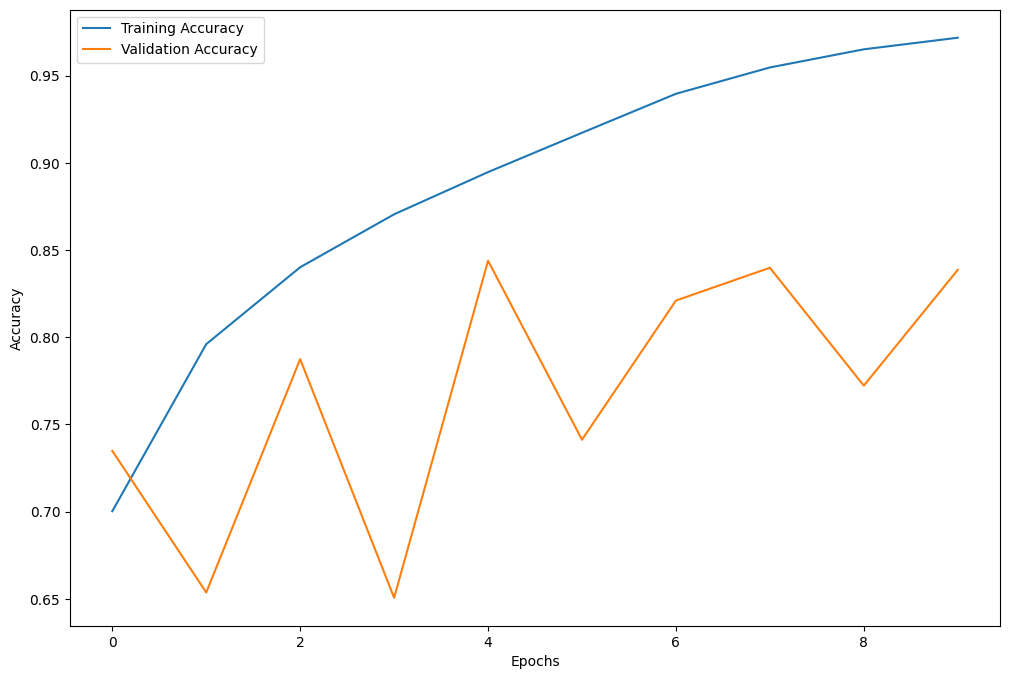

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Prediction

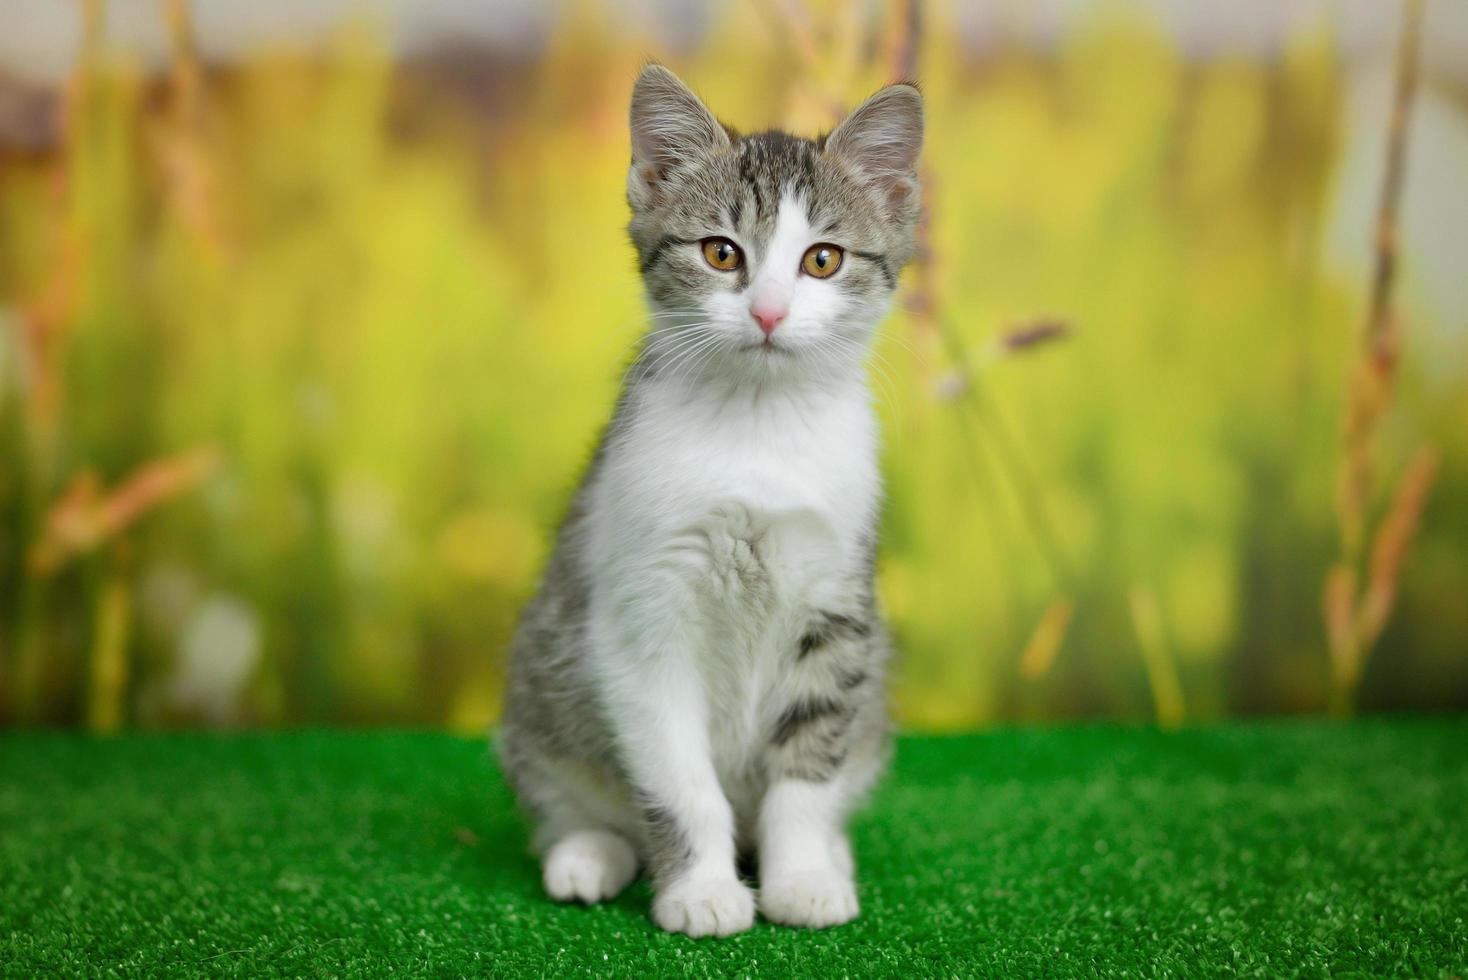

In [21]:
image = Image.open('assets\predict\cat.jpg')

display(image)

In [22]:
test_image = image.resize((64,64))

test_image_arr = np.array(test_image)
test_inp=test_image_arr.reshape((1,64,64,3))

In [23]:
test_inp = test_inp.astype('float32')  

test_inp /= 255.0 

In [24]:
prediction=model.predict(test_inp)
prediction

1/1 [==============================] - 0s 99ms/step


array([[0.0360221]], dtype=float32)

In [25]:
if(prediction<0.2):
    print("It is a image of a Cat")
elif(prediction>0.8):
    print("It is a image of a Dog")
else:
    print("Not sure")

It is a image of a Cat
